# Why care about probability & statistics?

Probability gives you the tools to model the data that you have. Data is large, fast, messy, and all of these aspects throw a wrench in understanding it. Probability distributions give you the tools to summarize that data in relatively straightforward ways. 


# A Gaussian (also called Normal) distribution

If you’re recording calcium fluorsences from the brain, this data will be positive and negative. Perhaps positive when something rewarding happens. Perhaps negative when the animal was expecting a reward but didn't receive one. This data is continuous, it has non-zero floating point representations on the computer. We can use these facts to select a family of probability distributions to model the data. A good candidate in this case would be the gaussian since it too is continuous, taking on positive and negative values.

But how do you use this distribution to summarize the data? Say you have data from an entire session of training an animal. You typically want to look at specific periods of the session (like when the animal makes a choice). One way to try and understand what happens when an animal makes a choice is to ask, on average, what is the response in the neural data when the animal makes a choice? We can answer this question using important quantities of the probability distribution we have chosen. For our gaussian distribution, we’d be interested in looking at the mean of the gaussian. We’ve now made an explicit link between the average response at choice time, and the mean of the gaussian distribution. 

Now the question becomes, how do we do it? Can we just say the average response is the mean? We can, but that’s not super helpful. Typically we want to say that the average response is the mean, and that mean is itself a result of some mathematical operation that takes into account peri-stimulus-choice time relevant events. For example, the animal has to consider the evidence (in a sensory decision making task) in front of it, and then make a choice. This takes us to our next step. We want to say the mean is equal to some task - relevant events multiplied by some unknowns that weigh the importance of those events. We also say that there is some random noise involved, because well, we assume the brain is noisy. In an equation that is

$$y= xw +  \epsilon \quad \quad (1)$$


and in words we say $\epsilon$ is the random noise, $x$ is the task relevant event, like the stimulus seen at choice time, and $w$ is the weight that weighs the importance of that stimulus. $\mu=xw$ is the mean. If we google what a gaussian distribution is, all paths flow to mentioning two important parameters, the mean and the variance. We denote a gaussian distribution as 


$$Normal(\mu, \sigma^2) = Normal(xw, \sigma^2)   \quad \quad  (2)   $$


Notice that we have $\epsilon$ in equation (1) and $\sigma^2$ in equation (2). This is a detail right now, but it’s because the random noise itself has a gaussian distribution.
Keep in mind the above, and always refer to it as motivation. We’ll now learn, in a somewhat removed sense, more about the Gaussian distribution, and other topics in probability. 


This is a continuous distribution for real-valued random variables. In additional these can be vector valued (i.e. multivariate) or scalar valued (univariate). The **probability density function** (PDF) of a univariate Gaussian is:

$$f(y; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} exp\Big(-\frac{1}{2}  \frac{(y - \mu)^2}{\sigma^2}\Big)$$

sometimes, depending on the notation you'll see this abbreviated as: 

$$p(y; \mu, \sigma^2) = Normal(y; \mu, \sigma^2)$$

where $Normal(\cdot)$ is equal to the function writen out above with the exponential in it. When we "evalute" the above we compute the density of some value $y$, under some fixed values for $\mu$ and $\sigma^2$

In [5]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# this is the mean
mu = 3.4

# this is the variance
sig_2 = 4

# we will evaluate the density by plugging in each value of y below
y = [0.1, 1, 2, 10.4]
"""
note that the norm object we just imported contains the same function
that Normal() contains, as written in the markup cell above
this function is used with the .pdf() call
two ways you can do this that are equivalent:
"""
way_one = norm.pdf(y, loc=mu, scale=np.sqrt(sig_2))

# uncomment these blelow
#print("first way: ", way_one)

# or you can create the object first:
way_two = norm(loc=mu, scale=np.sqrt(sig_2))
#print("second way: ", way_two.pdf(x))

"""
can you tell us the difference between these two, what does it mean in terms of 
what variables are available in the scope of your program?
""";

Text(0.5, 0, 'samples')

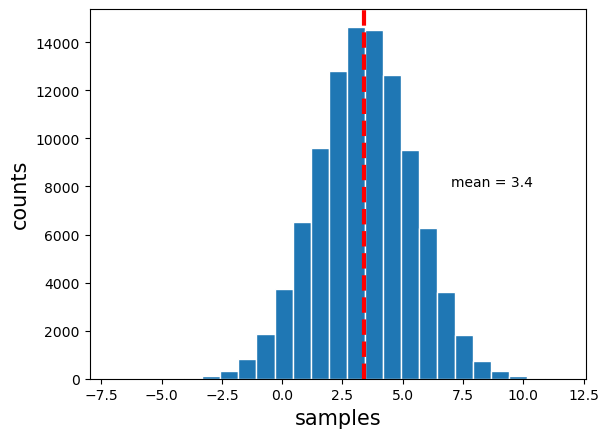

In [10]:
# sampling values from a normal distribution
num_samples = 100000
norm_distributed = norm(loc=mu, scale=np.sqrt(sig_2)).rvs(num_samples)

"""
we can visualize these samples with a histogram. With enough samples we start to get an
idea of what the true form of the distribution is (e.g. we get a sense for the mean and standard deviation)
"""
fs = 15
plt.hist(norm_distributed, edgecolor="white", bins=25);
plt.axvline(mu, color="red", linestyle="--", lw=3)
plt.annotate(xy=(7, 8000), text=f"mean = {mu}");
plt.ylabel("counts", fontsize = fs)
plt.xlabel("samples", fontsize = fs)

# Matching data to distributions


In the example outlined above, we described the data in some minimal but key ways: 
* calcium fluorsence is continuous
* calcium fluorsence takes on positive and negative values

this allowed us to look at the set of probability distributions and pick one family (the Gaussian family) to use to model it. 

We can and should do this in general for different types of data. 

The mean, $\mu$, of a Gaussian distribution is sometimes referred to as the "location" parameter. Intuitively you can think of it, in the univariate case, as the point on the real number line that the shape of the distribution is centered on. The standard deviation, $\sigma$ ,(recall that standard deviation is the square root of the variance) is sometimes referred to as the "scale" parameter. It will determine how much values spread out away from the peak.

# A Bernoulli distribution

We saw above that a Gaussian distribution is a continuos distribution, and in neuroscience it can be a decent model of continuous data, for example, measures of calcium activity. Now we'll look at a different distribution that is discrete. It's the Bernoulli family of distributions and it has the following **probability mass function** (PMF)

$$p(y; \theta) = \theta^y (1 - \theta)^{(1 - y)}$$

above the data $y$ are always either $0$ or $1$,"yes" or "no", left turn or right turn. Hopefully you get the idea. Also $\theta$ must be some number between $0$ and $1$, for example $0.56$ . The data consist of a set of  binary outcomes. As such, this might be a good candidate for a distribution when we need to model behavior that has two possible outcomes. With that in mind, let's ask the same question of, how do we make sense of data with this distribution?

Consider again the situation where an animal has sees a stimulus and must make a binary choice based off of the stimulus. Just like in example above we'll say the stimulus is denoted by the variable $x$, and it is weighed by some unknown $w$. In the calcium example we were able to say $\mu = xw$, and that was the end of it, because $\mu$ could be any number. We can't do that here because $\theta$ is restricted to be any number between 0 and 1. 

Now we can introduce the sigmoid function: 

$$\sigma(z) = \frac{1}{1 + exp(-z)}$$

we use this function to transform $xw$ into a number between 0 and 1; $\theta = \sigma(xw)$. Finally we can model the outcome $y$ using the PMF of a Bernoulli distribution: 

$$p(y; x, w, \sigma(\cdot)) = \sigma(xw)^y \big(1 - \sigma(xw)\big)^{1 - y}$$

below we show the output range of the sigmoid function for a range of input values. We see that it does indeed restrict all of it's outputs between 0 and 1

In [11]:
from scipy.stats import bernoulli
from scipy.special import expit

In [72]:
x = np.linspace(-16,16,1000) # sample x values, for example the opacity level of a visual stimulus
# appears on the right side of the screen (positive values) or left side of the screen (negative values)

w = 0.6 # set a weight

# define the sigmoid function
def sigmoid(x, w):
    return 1 / (1 + np.exp(-x*w))

In [77]:
rho = sigmoid(x, w)

"""
of course we don't need to define our own sigmoid function, scipy has one
""";
rho2 = expit(x*w)

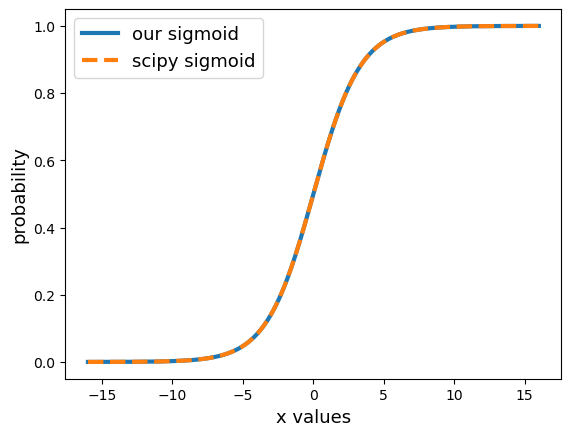

In [78]:
fs = 13
plt.plot(x, rho, lw=3, label="our sigmoid")
plt.plot(x, rho2, linestyle="--", lw=3, label="scipy sigmoid")
plt.xlabel("x values", fontsize=fs)
plt.ylabel("probability", fontsize=fs)
plt.legend(fontsize=fs)

In [86]:
"""
add some more things here
""";

# A Poisson distribution

Continuing with the theme we'll now look into yet another common distribution that can be used to help us summarize neuroscience data. This family is called the Poisson family of distributions. Like the Bernoulli family it is discrete. The type of data it models are counts, integers such as 5 or 3. Given this information we might reason that it's a natural choice to model spike counts from ephys experiments. It has the following PMF, where now $y$ is the number of spikes

 $$p(y; \lambda) = \frac{\lambda^y e ^{-\lambda}}{y!}$$


in this example, just like in the Bernoulli example notice that the function is not initially parametrized in terms of $x$ (stimulus) or $w$ (weights on stimulus), but instead using the parameter $\lambda$. Just like in the Bernoulli example we'll use a function to relate $\lambda$ to the product $xw$.

That function is

$$\lambda = g(x, w) = e^{xw}$$

giving us the PMF in terms of this function as:

 $$p(y; x, w, g(\cdot)) = \frac{g(x, w)^y e ^{-g(x, w)}}{y!}$$
 
in the choice data example above we gave the motivation that because the parameter that a Bernoulli distribution takes has to be between 0 and 1, we need the sigmoid function to transform the product $xw$ into the correct range. Poisson distributions also have a contraint, namely that $\lambda >= 0$. The function $g(\cdot)$ ensures this. To see this note that in general $log(u) = a \times b$ necessarily imples that $u = e^{a \times b}$, and log function is undefined for real-valued negative numbers. Plugging this in we have: 

$$log(\lambda) = xw \ge 0$$

In [87]:
from scipy.stats import poisson